In [2]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn import neighbors
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import fbeta_score, make_scorer
import seaborn as sns
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import GridSearchCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Read the training and test csv files and convert them to a dataframe each
data = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')

In [4]:
data.head()

,session_id,administrative,administrative_duration,informational,informational_duration,productrelated,productrelated_duration,bouncerates,exitrates,pagevalues,specialday,month,operatingsystems,browser,region,traffictype,visitortype,weekend,revenue
0,139957,2,47.500000,0,0.0,19,1203.480714,0.000000,0.027421,6.748509,0.0,Nov,2,2,3,2,Returning_Visitor,False,0
1,496587,0,0.000000,0,0.0,7,152.000000,0.000000,0.033333,0.000000,0.0,Dec,3,2,6,3,Returning_Visitor,False,0
2,440268,7,206.500000,1,389.9,95,4415.889952,0.000133,0.033750,2.676062,0.0,Nov,2,2,1,20,Returning_Visitor,False,0
3,294672,1,18.258571,0,0.0,103,8305.048706,0.004871,0.034746,6.824908,0.0,Nov,2,2,1,2,Returning_Visitor,True,1
4,497475,0,0.000000,0,0.0,42,1305.108333,0.016068,0.039742,0.000000,0.0,Dec,3,2,5,2,Returning_Visitor,False,0


In [5]:
data.shape

(40000, 19)

In [6]:
data_test.head()

,session_id,administrative,administrative_duration,informational,informational_duration,productrelated,productrelated_duration,bouncerates,exitrates,pagevalues,specialday,month,operatingsystems,browser,region,traffictype,visitortype,weekend
0,283149,0,0.0,0,0.0,10,388.000000,0.000000,0.014286,0.0,0.0,Nov,1,2,8,2,New_Visitor,False
1,253020,0,0.0,0,0.0,17,142.400000,0.017707,0.044623,0.0,0.0,Nov,1,2,3,8,New_Visitor,False
2,348435,0,0.0,0,0.0,47,1683.733333,0.020556,0.026367,0.0,0.0,Mar,2,5,9,1,Returning_Visitor,False
3,299763,0,0.0,1,904.0,33,543.433333,0.000000,0.015713,0.0,0.0,Nov,2,2,3,11,Returning_Visitor,True
4,195120,0,0.0,2,17.0,4,0.000000,0.200000,0.200000,0.0,0.0,Mar,2,4,6,1,Returning_Visitor,True


In [7]:
data_test.shape

(10000, 18)

In [9]:
data['revenue'].value_counts()

0    33669
1     6331
Name: revenue, dtype: int64

#### Visualizing the imbalance

<AxesSubplot:xlabel='revenue', ylabel='count'>

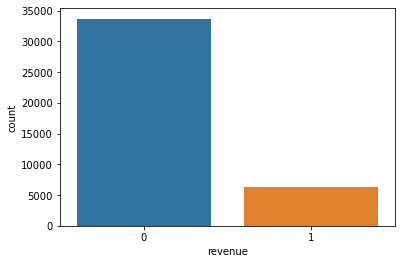

In [10]:
sns.countplot(data['revenue'])

In [11]:
data.isna().sum()

session_id                 0
administrative             0
administrative_duration    0
informational              0
informational_duration     0
productrelated             0
productrelated_duration    0
bouncerates                0
exitrates                  0
pagevalues                 0
specialday                 0
month                      0
operatingsystems           0
browser                    0
region                     0
traffictype                0
visitortype                0
weekend                    0
revenue                    0
dtype: int64

#### Cleaning training data

In [12]:
# Replace special character * from columns traffictype, browser, operatingsystems
data['traffictype'] = data['traffictype'].replace("*", 2)
data['traffictype'] = pd.to_numeric(data['traffictype'])
data['browser'] = data['browser'].replace("*", 2)
data['browser'] = pd.to_numeric(data['browser'])
data['operatingsystems'] = data['operatingsystems'].replace("*", 2)
data['operatingsystems'] = pd.to_numeric(data['operatingsystems'])

# Convert the column - weekend to integer from boolean value
data['weekend'] = data['weekend'].astype(int)

# Convert the categorical column month to numeric representation of months.
d = dict((v,k) for k,v in zip(range(1, 13), data.month.unique()))
# create column
data['month'] = data['month'].map(d)

In [13]:
# The feature columns are derived in X and the target column revenue is derived in y.
X = data.drop(columns=['revenue']).copy()
y = data['revenue'].copy()
x_en = pd.get_dummies(X)

#### Cleaning testing data

In [29]:
data_test['traffictype'] = data_test['traffictype'].replace("*", 4)
data_test['traffictype'] = pd.to_numeric(data_test['traffictype'])
data_test['browser'] = data_test['browser'].replace("*", 2)
data_test['browser'] = pd.to_numeric(data_test['browser'])
data_test['operatingsystems'] = data_test['operatingsystems'].replace("*", 2)
data_test['operatingsystems'] = pd.to_numeric(data_test['operatingsystems'])
data_test['weekend'] = data_test['weekend'].astype(int)
data_test.month.value_counts()
d = dict((v,k) for k,v in zip(range(1, 13), data_test.month.unique()))
# create column
data_test['month'] = data_test['month'].map(d)

In [30]:
x_test = pd.get_dummies(data_test)

feature_selected= ['administrative', 'productrelated', 'productrelated_duration', 'bouncerates', 'exitrates', 'pagevalues', 'weekend', 'visitortype_New_Visitor', 'visitortype_Returning_Visitor']
x_test=x_test[feature_selected]
x_test

,administrative,productrelated,productrelated_duration,bouncerates,exitrates,pagevalues,weekend,visitortype_New_Visitor,visitortype_Returning_Visitor
0,0,10,388.000000,0.000000,0.014286,0.000000,0,1,0
1,0,17,142.400000,0.017707,0.044623,0.000000,0,1,0
2,0,47,1683.733333,0.020556,0.026367,0.000000,0,0,1
3,0,33,543.433333,0.000000,0.015713,0.000000,1,0,1
4,0,4,0.000000,0.200000,0.200000,0.000000,1,0,1
...,...,...,...,...,...,...,...,...,...
9995,7,161,3747.054690,0.001341,0.024272,15.250582,0,0,1
9996,0,7,801.000000,0.000000,0.022222,0.000000,0,1,0
9997,0,8,203.500000,0.000000,0.040000,0.000000,1,0,1
9998,0,9,202.500000,0.000000,0.007509,0.000000,0,1,0


### Anomaly Detection Example with Local Outlier Factor in Python:

#### The Local Outlier Factor is an algorithm to detect anomalies in observation data. Measuring the local density score of each sample and weighting their scores are the main concept of the algorithm. By comparing the score of the sample to its neighbors, the algorithm defines the lower density elements as anomalies in data.

In [14]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.datasets import make_blobs
from numpy import quantile, where, random
import matplotlib.pyplot as plt


lof = LocalOutlierFactor()
yhat = lof.fit_predict(x_en.to_numpy())
mask=yhat!=-1
x=x_en.to_numpy()[mask, :]
x=pd.DataFrame(x, columns=x_en.columns)
y=y[mask]
print(x.shape, y.shape)

(38973, 20) (38973,)


#### Apply an oversampling+undersampling method to balance this imbalanced dataset.

In [15]:
# Using Oversampling
oversample = SMOTE(random_state = 0)
X_os, y_os = oversample.fit_resample(x, y)

In [16]:
# define the undersampling method
undersample = TomekLinks()

# transform the dataset
X_train, y_train = undersample.fit_resample(X_os, y_os)

#### Feature Importance with ExtraTrees

In [17]:
model_featureImportance = ExtraTreesClassifier()
model_featureImportance.fit(X_train, y_train)
print(model_featureImportance.feature_importances_)

[0.02368263 0.04692298 0.0317588  0.02500649 0.0165333  0.03984136
 0.04132324 0.04000732 0.05678871 0.37564048 0.01097575 0.03727821
 0.02526973 0.02086668 0.03200843 0.02827637 0.05562219 0.04489005
 0.00139303 0.04591427]


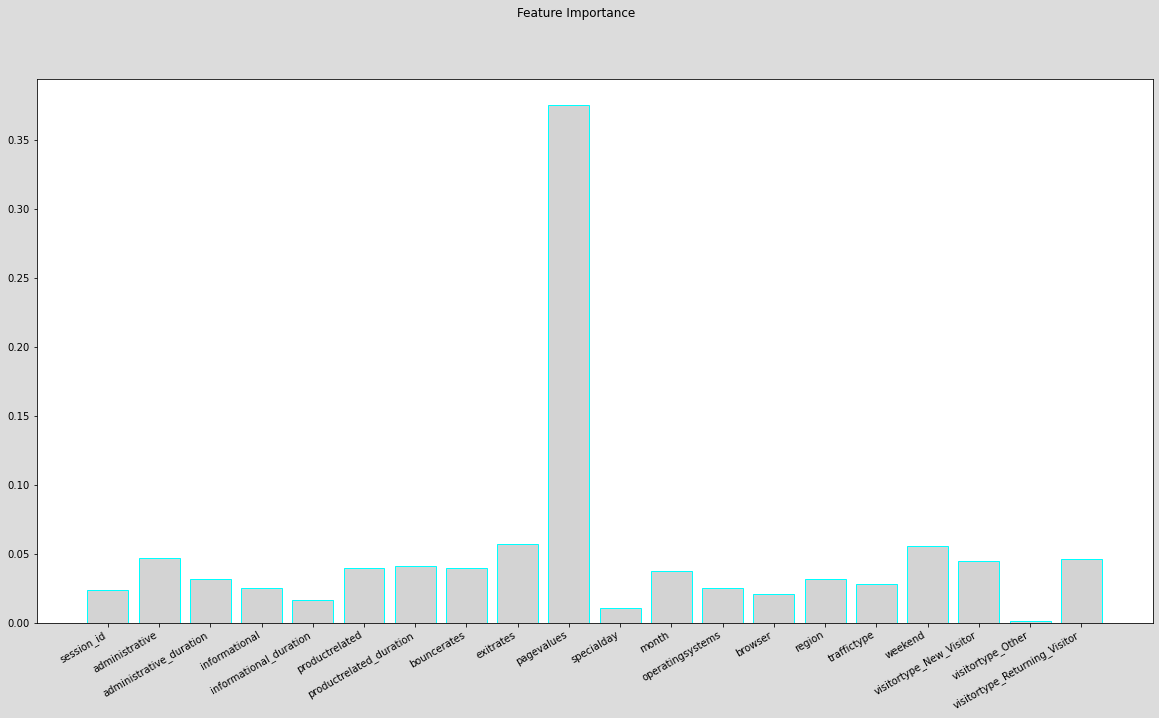

In [19]:
score=model_featureImportance.feature_importances_
name=X_train.columns
fig=plt.figure(figsize=(20,10),facecolor='gainsboro')
fig.suptitle('Feature Importance')
ax=fig.add_subplot(111)
plt.bar(x=name,height=score,color='lightgrey',edgecolor='cyan')
plt.xticks(rotation=30, ha='right')
plt.show()

In [20]:
feature_selected= ['administrative', 'productrelated', 'productrelated_duration', 'bouncerates', 'exitrates', 'pagevalues', 'weekend', 'visitortype_New_Visitor', 'visitortype_Returning_Visitor']
X_train=X_train[feature_selected]
X_train

,administrative,productrelated,productrelated_duration,bouncerates,exitrates,pagevalues,weekend,visitortype_New_Visitor,visitortype_Returning_Visitor
0,2.000000,19.000000,1203.480714,0.000000,0.027421,6.748509,0.000000,0.000000,1.000000
1,0.000000,7.000000,152.000000,0.000000,0.033333,0.000000,0.000000,0.000000,1.000000
2,7.000000,95.000000,4415.889952,0.000133,0.033750,2.676062,0.000000,0.000000,1.000000
3,1.000000,103.000000,8305.048706,0.004871,0.034746,6.824908,1.000000,0.000000,1.000000
4,0.000000,42.000000,1305.108333,0.016068,0.039742,0.000000,0.000000,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...
63842,3.200093,43.198705,1121.170734,0.006125,0.029711,12.990264,1.000000,0.000000,1.000000
63843,1.865541,15.075670,382.118873,0.012437,0.032281,22.241373,0.000000,0.000000,1.000000
63844,1.462520,91.946969,4538.860988,0.001545,0.010678,4.350457,0.817185,0.000000,1.000000
63845,0.000000,17.000000,478.809144,0.000000,0.012092,33.153517,0.589289,0.000000,1.000000


### Make Cross Validation function


In [21]:
f2_scorer = make_scorer(fbeta_score, beta=2)
f2_scorer

make_scorer(fbeta_score, beta=2)

In [22]:
scoring = f2_scorer

In [23]:
kfold = StratifiedKFold(n_splits=10, random_state=14, shuffle=True)

In [24]:
def grid_model(x, y , model , param):
    grid=GridSearchCV(estimator=model, param_grid=param, scoring=scoring, cv=kfold, n_jobs=-1)
    grid.fit(x, y)
    print("Best Score: %f use parameters: %s" % (grid.best_score_, grid.best_params_))

In [25]:
def cross_validation(x, y, model):
    result= cross_val_score(model, x, y, cv=kfold, scoring=scoring, n_jobs=-1)
    print("Score: %f" % result.mean())

#### Logistic Regression Model

In [26]:
logr = LogisticRegression()
logr.fit(X_train, y_train)

LogisticRegression()

In [27]:
cross_validation(X_train, y_train, logr)

Score: 0.816042


In [126]:
y_test = logr.predict(x_test)
y_test = pd.Series(y_test)
y_test.value_counts(normalize=True)

0    0.7937
1    0.2063
dtype: float64

#### KNeighbors Classifier Model

In [31]:
knn = neighbors.KNeighborsClassifier()

# fit the model
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [32]:
y_test = knn.predict(x_test)
y_test = pd.Series(y_test)
y_test.value_counts(normalize=True)

0    0.7447
1    0.2553
dtype: float64

#### Linear Discriminant Analysis Model

In [33]:
param_ld=dict(solver=['svd', 'lsqr', 'eigen'])
model_ld=LinearDiscriminantAnalysis()
grid_model(X_train, y_train, model_ld, param_ld)

Best Score: 0.760215 use parameters: {'solver': 'svd'}


In [34]:
model_ld=LinearDiscriminantAnalysis(solver='svd')
model_ld.fit(X_train, y_train)
y_test = model_ld.predict(x_test)
y_test = pd.Series(y_test)
y_test.value_counts(normalize=True)

0    0.7869
1    0.2131
dtype: float64

#### Random Forest Model

In [130]:
param_randomforest=dict(n_estimators=range(10,100,10))
model_randomforest=RandomForestClassifier(class_weight='balanced_subsample')
grid_model(X_train, y_train, model_randomforest, param_randomforest)

Best Score: 0.944355 use parameters: {'n_estimators': 80}


In [35]:
final_randomforest=RandomForestClassifier(n_estimators=90, class_weight='balanced_subsample')
final_randomforest.fit(X_train, y_train)
y_test = final_randomforest.predict(x_test)
y_test = pd.Series(y_test)
y_test.value_counts(normalize=True)

0    0.7971
1    0.2029
dtype: float64

#### GaussianNB (Naive Bayes) Model

In [37]:
model_nb=GaussianNB()
cross_validation(X_train, y_train, model_nb)

Score: 0.747052


In [38]:
model_nb.fit(X_train, y_train)
y_test = model_nb.predict(x_test)
y_test = pd.Series(y_test)
y_test.value_counts(normalize=True)

0    0.692
1    0.308
dtype: float64

#### Decision Tree(CART) Model

In [138]:
model_cart=DecisionTreeClassifier(class_weight='balanced')
param_cart=dict(max_depth=range(2,10,1))
grid_model(X_train, y_train, model_cart, param_cart)

Best Score: 0.945095 use parameters: {'max_depth': 4}


In [40]:
model_cart=DecisionTreeClassifier(class_weight='balanced', max_depth=4)
model_cart.fit(X_train, y_train)
y_test = model_cart.predict(x_test)
y_test = pd.Series(y_test)
y_test.value_counts(normalize=True)

0    0.7516
1    0.2484
dtype: float64

#### Evaluate Random Forest Model

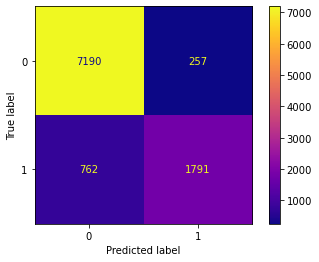

In [131]:
final_randomforest=RandomForestClassifier(n_estimators=90, class_weight='balanced_subsample')
final_randomforest.fit(X_train, y_train)
plot_confusion_matrix(final_randomforest, x_test, y_test, cmap=plt.cm.plasma)

#### Evaluate LinearDiscriminantAnalysis Model

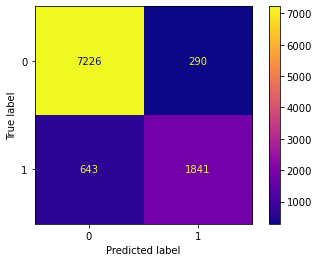

In [42]:
model_ld=LinearDiscriminantAnalysis(solver='svd')
model_ld.fit(X_train, y_train)
plot_confusion_matrix(model_ld, x_test, y_test, cmap=plt.cm.plasma)

#### Evaluate LogisticRegression Model

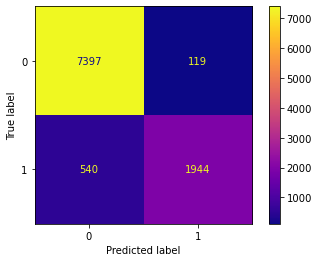

In [43]:
model_ld=LogisticRegression()
model_ld.fit(X_train, y_train)
plot_confusion_matrix(model_ld, x_test, y_test, cmap=plt.cm.plasma)

#### Evaluate GaussianNB (Naive Bayes) Model

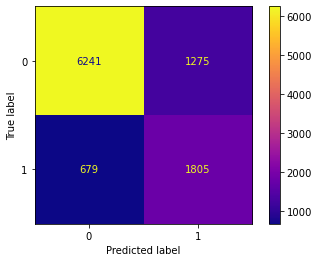

In [44]:
model_nb=GaussianNB()
model_nb.fit(X_train, y_train)
plot_confusion_matrix(model_nb, x_test, y_test, cmap=plt.cm.plasma)

#### Evaluate Decision Tree(CART) Model

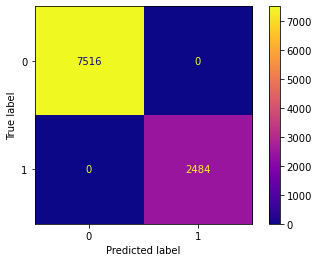

In [45]:
model_cart=DecisionTreeClassifier(class_weight='balanced', max_depth=4)
model_cart.fit(X_train, y_train)
plot_confusion_matrix(model_cart, x_test, y_test, cmap=plt.cm.plasma)